In [78]:
#import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#import dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [91]:
#finds the top most in demand roles
top3_jobs = df.groupby(by='job_title_short')['job_title_short'].count().sort_values(ascending = False).head(3).index.to_list()

#Creates the dataframe containing skills, job titles, and the counts. 
df_US = df[df['job_country'] == 'United States']
df_exploded = df_US.explode('job_skills')
df_exploded = df_exploded[df_exploded['job_title_short'].isin(top3_jobs)]
df_exp = df_exploded.groupby(['job_skills', 'job_title_short']).size().reset_index(name = 'skill_count').sort_values(by = 'skill_count', ascending=False)


In [103]:
#Creates dataframe containing percentage 
df_job_title_counts = df_US['job_title_short'].value_counts().reset_index(name = 'job_counts')
df_perc = pd.merge(df_exp, df_job_title_counts, on = 'job_title_short', how = 'left')
df_perc['percentage'] = df_perc['skill_count'] / df_perc['job_counts'] * 100

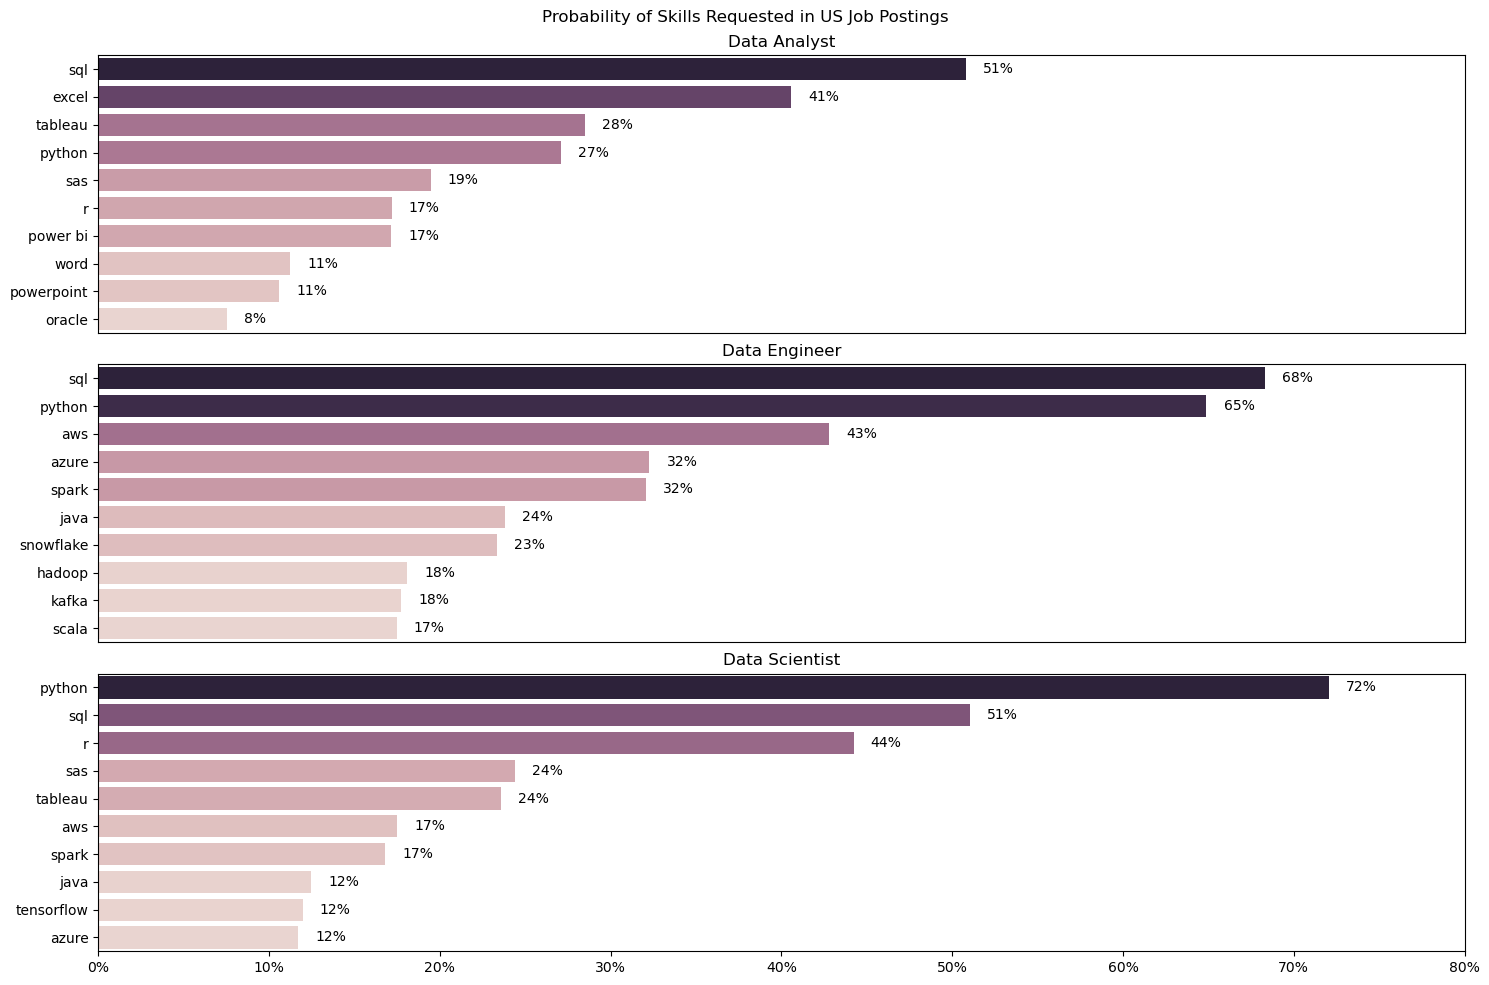

In [102]:
import seaborn as sns
fig, ax = plt.subplots(len(top3_jobs), 1, figsize = (15,10))
for i, job_title in enumerate(top3_jobs):
    df_plot = df_perc[df_perc['job_title_short'] == job_title].head(10)
    sns.barplot(x = 'percentage', y = 'job_skills', data = df_plot, ax=ax[i], hue='percentage', legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
    ax[i].set_xlim(0,80)

    if i != len(top3_jobs) - 1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Probability of Skills Requested in US Job Postings')
fig.tight_layout(h_pad=0.8)
plt.show()

